# KASPI BANK TASK 1 SOLUTION

Importing all needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_name = 'task1.xlsx'
xl = pd.ExcelFile(file_name)

In [3]:
TRAIN_SHEET = xl.parse('TRAIN')
TEST_SHEET = xl.parse('TEST')

In [4]:
print(TRAIN_SHEET.shape)
print(TEST_SHEET.shape)
print(TRAIN_SHEET.head(2))
print(TEST_SHEET.head(2))

(6000, 17)
(3249, 16)
   ID  YEAR VIN_1 VIN_2 VIN_3  VIN_15  VIN_16  VIN_17  ENGINE_VOLUME  \
0   0     9     J     M     Y     1.0     0.0     2.0            3.0   
1   1    10     N     M     T     1.0     8.0     0.0            1.6   

    FUEL_TYPE    BODY_TYPE    TYPE_OF_DRIVE INTERIOR_TYPE TRANSM_TYPE  \
0  Бензин-Газ  Внедорожник    Полный привод          КОЖА        АКПП   
1      Бензин        Седан  Передний привод         ВЕЛЮР        МКПП   

       AUTO_CONDITION     AVG_COST  ESTIM_COST  
0  Удовлетворительное  5725925.926     4688000  
1  Удовлетворительное  2211538.462     1853000  
      ID  YEAR VIN_1 VIN_2 VIN_3  VIN_15  VIN_16  VIN_17  ENGINE_VOLUME  \
0  10000    13     J     M     Z     1.0     6.0     6.0            2.0   
1  10001    10     J     T     M     1.0     6.0     4.0            2.4   

  FUEL_TYPE  BODY_TYPE    TYPE_OF_DRIVE INTERIOR_TYPE TRANSM_TYPE  \
0    Бензин    Минивэн  Передний привод         ВЕЛЮР        АКПП   
1    Бензин  Кроссовер    Полн

In [5]:
trainLength = len(TRAIN_SHEET['ID'])
testLength = len(TEST_SHEET['ID'])
print(trainLength)
print(testLength)

6000
3249


In [6]:
TEST_SHEET['ESTIM_COST'] = pd.Series(np.random.randn(testLength), index=TEST_SHEET.index)
print(TEST_SHEET.head(3))

      ID  YEAR VIN_1 VIN_2 VIN_3  VIN_15  VIN_16  VIN_17  ENGINE_VOLUME  \
0  10000    13     J     M     Z     1.0     6.0     6.0            2.0   
1  10001    10     J     T     M     1.0     6.0     4.0            2.4   
2  10002     5     K     M     H     0.0     4.0     7.0            2.0   

    FUEL_TYPE  BODY_TYPE    TYPE_OF_DRIVE    INTERIOR_TYPE TRANSM_TYPE  \
0      Бензин    Минивэн  Передний привод            ВЕЛЮР        АКПП   
1      Бензин  Кроссовер    Полный привод            ВЕЛЮР        АКПП   
2  Бензин-Газ  Кроссовер    Полный привод  КОМБИНИРОВАННЫЙ        АКПП   

       AUTO_CONDITION     AVG_COST  ESTIM_COST  
0  Удовлетворительное  1734883.721   -0.162924  
1  Удовлетворительное  4315384.615   -0.628228  
2  Удовлетворительное  5110810.811   -2.658090  


In [7]:
MAIN_DATA = pd.concat([TRAIN_SHEET, TEST_SHEET], ignore_index=True)
print(MAIN_DATA.head())

   ID  YEAR VIN_1 VIN_2 VIN_3  VIN_15  VIN_16  VIN_17  ENGINE_VOLUME  \
0   0     9     J     M     Y     1.0     0.0     2.0            3.0   
1   1    10     N     M     T     1.0     8.0     0.0            1.6   
2   2    17     W     A     U     8.0     9.0     7.0            2.4   
3   3     4     K     M     H     9.0     1.0     8.0            1.6   
4   4    17     J     A     4     4.0     3.0     1.0            3.0   

    FUEL_TYPE    BODY_TYPE    TYPE_OF_DRIVE INTERIOR_TYPE TRANSM_TYPE  \
0  Бензин-Газ  Внедорожник    Полный привод          КОЖА        АКПП   
1      Бензин        Седан  Передний привод         ВЕЛЮР        МКПП   
2      Бензин        Седан  Передний привод         ВЕЛЮР        АКПП   
3      Бензин        Седан  Передний привод         ВЕЛЮР        АКПП   
4      Бензин  Внедорожник    Полный привод          КОЖА        АКПП   

       AUTO_CONDITION     AVG_COST  ESTIM_COST  
0  Удовлетворительное  5725925.926   4688000.0  
1  Удовлетворительное  2211538

In [8]:
MAIN_DATA[MAIN_DATA.select_dtypes(['object']).columns] = MAIN_DATA.select_dtypes(['object']).apply(lambda x: x.astype('category'))
cat_columns = MAIN_DATA.select_dtypes(['category']).columns
MAIN_DATA[cat_columns] = MAIN_DATA[cat_columns].apply(lambda x: x.cat.codes)
DATA = MAIN_DATA.fillna(MAIN_DATA.mean())

In [9]:
TRAIN_DATA = DATA[:(trainLength)]
TRAIN_DATA = TRAIN_DATA.drop('ID', axis = True)
TEST_DATA = DATA[trainLength:]
TEST_DATA = TEST_DATA.drop('ESTIM_COST', axis = True).drop('ID' , axis = True)

In [10]:
print(TRAIN_DATA.shape)
print(TEST_DATA.shape)
print(TRAIN_DATA.head(2))
print(TEST_DATA.head(2))

(6000, 16)
(3249, 15)
   YEAR  VIN_1  VIN_2  VIN_3  VIN_15  VIN_16  VIN_17  ENGINE_VOLUME  \
0     9     10     17     31     1.0     0.0     2.0            3.0   
1    10     14     17     26     1.0     8.0     0.0            1.6   

   FUEL_TYPE  BODY_TYPE  TYPE_OF_DRIVE  INTERIOR_TYPE  TRANSM_TYPE  \
0          1          0              2              1            0   
1          0          4              1              0            1   

   AUTO_CONDITION     AVG_COST  ESTIM_COST  
0               1  5725925.926   4688000.0  
1               1  2211538.462   1853000.0  
      YEAR  VIN_1  VIN_2  VIN_3  VIN_15  VIN_16  VIN_17  ENGINE_VOLUME  \
6000    13     10     17     32     1.0     6.0     6.0            2.0   
6001    10     10     23     20     1.0     6.0     4.0            2.4   

      FUEL_TYPE  BODY_TYPE  TYPE_OF_DRIVE  INTERIOR_TYPE  TRANSM_TYPE  \
6000          0          2              1              0            0   
6001          0          1              2        

In [11]:
X_train = TRAIN_DATA[["YEAR" ,"AVG_COST"]]
Y_train = TRAIN_DATA["ESTIM_COST"]
print(X_train.shape)
print(Y_train.shape)

(6000, 2)
(6000,)


In [37]:
X_norm_train = (X_train - X_train.mean()) / (X_train.max() - X_train.min())
Y_norm_train = (Y_train - Y_train.mean()) / (Y_train.max() - Y_train.min())
# X_norm_train = X_train
# Y_norm_train = Y_train

In [38]:
from __future__ import print_function
from itertools import count

import torch
from torch import nn
import torch.autograd
import torch.nn.functional as F
from torch.autograd import Variable
from torch import optim

In [39]:
x_train = torch.FloatTensor(X_norm_train.as_matrix())
y_train = torch.FloatTensor(Y_norm_train.as_matrix())

In [40]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(2, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out

In [41]:
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

In [42]:
num_epochs = 230000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))

Epoch[100/230000], loss: 0.497056
Epoch[200/230000], loss: 0.478241
Epoch[300/230000], loss: 0.460164
Epoch[400/230000], loss: 0.442794
Epoch[500/230000], loss: 0.426103
Epoch[600/230000], loss: 0.410065
Epoch[700/230000], loss: 0.394656
Epoch[800/230000], loss: 0.379850
Epoch[900/230000], loss: 0.365624
Epoch[1000/230000], loss: 0.351955
Epoch[1100/230000], loss: 0.338819
Epoch[1200/230000], loss: 0.326199
Epoch[1300/230000], loss: 0.314072
Epoch[1400/230000], loss: 0.302420
Epoch[1500/230000], loss: 0.291223
Epoch[1600/230000], loss: 0.280464
Epoch[1700/230000], loss: 0.270126
Epoch[1800/230000], loss: 0.260192
Epoch[1900/230000], loss: 0.250646
Epoch[2000/230000], loss: 0.241474
Epoch[2100/230000], loss: 0.232661
Epoch[2200/230000], loss: 0.224192
Epoch[2300/230000], loss: 0.216053
Epoch[2400/230000], loss: 0.208234
Epoch[2500/230000], loss: 0.200719
Epoch[2600/230000], loss: 0.193498
Epoch[2700/230000], loss: 0.186560
Epoch[2800/230000], loss: 0.179892
Epoch[2900/230000], loss: 0.1

Epoch[23500/230000], loss: 0.012399
Epoch[23600/230000], loss: 0.012378
Epoch[23700/230000], loss: 0.012358
Epoch[23800/230000], loss: 0.012338
Epoch[23900/230000], loss: 0.012318
Epoch[24000/230000], loss: 0.012298
Epoch[24100/230000], loss: 0.012278
Epoch[24200/230000], loss: 0.012259
Epoch[24300/230000], loss: 0.012239
Epoch[24400/230000], loss: 0.012219
Epoch[24500/230000], loss: 0.012200
Epoch[24600/230000], loss: 0.012180
Epoch[24700/230000], loss: 0.012161
Epoch[24800/230000], loss: 0.012141
Epoch[24900/230000], loss: 0.012122
Epoch[25000/230000], loss: 0.012103
Epoch[25100/230000], loss: 0.012084
Epoch[25200/230000], loss: 0.012065
Epoch[25300/230000], loss: 0.012046
Epoch[25400/230000], loss: 0.012027
Epoch[25500/230000], loss: 0.012009
Epoch[25600/230000], loss: 0.011990
Epoch[25700/230000], loss: 0.011971
Epoch[25800/230000], loss: 0.011953
Epoch[25900/230000], loss: 0.011934
Epoch[26000/230000], loss: 0.011915
Epoch[26100/230000], loss: 0.011897
Epoch[26200/230000], loss: 0

Epoch[46600/230000], loss: 0.008915
Epoch[46700/230000], loss: 0.008903
Epoch[46800/230000], loss: 0.008892
Epoch[46900/230000], loss: 0.008880
Epoch[47000/230000], loss: 0.008869
Epoch[47100/230000], loss: 0.008857
Epoch[47200/230000], loss: 0.008846
Epoch[47300/230000], loss: 0.008834
Epoch[47400/230000], loss: 0.008823
Epoch[47500/230000], loss: 0.008811
Epoch[47600/230000], loss: 0.008800
Epoch[47700/230000], loss: 0.008788
Epoch[47800/230000], loss: 0.008777
Epoch[47900/230000], loss: 0.008766
Epoch[48000/230000], loss: 0.008754
Epoch[48100/230000], loss: 0.008743
Epoch[48200/230000], loss: 0.008732
Epoch[48300/230000], loss: 0.008721
Epoch[48400/230000], loss: 0.008709
Epoch[48500/230000], loss: 0.008698
Epoch[48600/230000], loss: 0.008687
Epoch[48700/230000], loss: 0.008676
Epoch[48800/230000], loss: 0.008665
Epoch[48900/230000], loss: 0.008654
Epoch[49000/230000], loss: 0.008643
Epoch[49100/230000], loss: 0.008631
Epoch[49200/230000], loss: 0.008620
Epoch[49300/230000], loss: 0

Epoch[69700/230000], loss: 0.006767
Epoch[69800/230000], loss: 0.006760
Epoch[69900/230000], loss: 0.006752
Epoch[70000/230000], loss: 0.006745
Epoch[70100/230000], loss: 0.006738
Epoch[70200/230000], loss: 0.006730
Epoch[70300/230000], loss: 0.006723
Epoch[70400/230000], loss: 0.006716
Epoch[70500/230000], loss: 0.006709
Epoch[70600/230000], loss: 0.006702
Epoch[70700/230000], loss: 0.006694
Epoch[70800/230000], loss: 0.006687
Epoch[70900/230000], loss: 0.006680
Epoch[71000/230000], loss: 0.006673
Epoch[71100/230000], loss: 0.006666
Epoch[71200/230000], loss: 0.006659
Epoch[71300/230000], loss: 0.006651
Epoch[71400/230000], loss: 0.006644
Epoch[71500/230000], loss: 0.006637
Epoch[71600/230000], loss: 0.006630
Epoch[71700/230000], loss: 0.006623
Epoch[71800/230000], loss: 0.006616
Epoch[71900/230000], loss: 0.006609
Epoch[72000/230000], loss: 0.006602
Epoch[72100/230000], loss: 0.006595
Epoch[72200/230000], loss: 0.006588
Epoch[72300/230000], loss: 0.006581
Epoch[72400/230000], loss: 0

Epoch[92600/230000], loss: 0.005407
Epoch[92700/230000], loss: 0.005402
Epoch[92800/230000], loss: 0.005398
Epoch[92900/230000], loss: 0.005393
Epoch[93000/230000], loss: 0.005388
Epoch[93100/230000], loss: 0.005383
Epoch[93200/230000], loss: 0.005379
Epoch[93300/230000], loss: 0.005374
Epoch[93400/230000], loss: 0.005369
Epoch[93500/230000], loss: 0.005365
Epoch[93600/230000], loss: 0.005360
Epoch[93700/230000], loss: 0.005355
Epoch[93800/230000], loss: 0.005350
Epoch[93900/230000], loss: 0.005346
Epoch[94000/230000], loss: 0.005341
Epoch[94100/230000], loss: 0.005337
Epoch[94200/230000], loss: 0.005332
Epoch[94300/230000], loss: 0.005327
Epoch[94400/230000], loss: 0.005323
Epoch[94500/230000], loss: 0.005318
Epoch[94600/230000], loss: 0.005314
Epoch[94700/230000], loss: 0.005309
Epoch[94800/230000], loss: 0.005304
Epoch[94900/230000], loss: 0.005300
Epoch[95000/230000], loss: 0.005295
Epoch[95100/230000], loss: 0.005291
Epoch[95200/230000], loss: 0.005286
Epoch[95300/230000], loss: 0

Epoch[115700/230000], loss: 0.004504
Epoch[115800/230000], loss: 0.004501
Epoch[115900/230000], loss: 0.004498
Epoch[116000/230000], loss: 0.004495
Epoch[116100/230000], loss: 0.004491
Epoch[116200/230000], loss: 0.004488
Epoch[116300/230000], loss: 0.004485
Epoch[116400/230000], loss: 0.004482
Epoch[116500/230000], loss: 0.004479
Epoch[116600/230000], loss: 0.004476
Epoch[116700/230000], loss: 0.004473
Epoch[116800/230000], loss: 0.004470
Epoch[116900/230000], loss: 0.004466
Epoch[117000/230000], loss: 0.004463
Epoch[117100/230000], loss: 0.004460
Epoch[117200/230000], loss: 0.004457
Epoch[117300/230000], loss: 0.004454
Epoch[117400/230000], loss: 0.004451
Epoch[117500/230000], loss: 0.004448
Epoch[117600/230000], loss: 0.004445
Epoch[117700/230000], loss: 0.004442
Epoch[117800/230000], loss: 0.004438
Epoch[117900/230000], loss: 0.004435
Epoch[118000/230000], loss: 0.004432
Epoch[118100/230000], loss: 0.004429
Epoch[118200/230000], loss: 0.004426
Epoch[118300/230000], loss: 0.004423
E

Epoch[138300/230000], loss: 0.003900
Epoch[138400/230000], loss: 0.003897
Epoch[138500/230000], loss: 0.003895
Epoch[138600/230000], loss: 0.003893
Epoch[138700/230000], loss: 0.003891
Epoch[138800/230000], loss: 0.003888
Epoch[138900/230000], loss: 0.003886
Epoch[139000/230000], loss: 0.003884
Epoch[139100/230000], loss: 0.003882
Epoch[139200/230000], loss: 0.003880
Epoch[139300/230000], loss: 0.003877
Epoch[139400/230000], loss: 0.003875
Epoch[139500/230000], loss: 0.003873
Epoch[139600/230000], loss: 0.003871
Epoch[139700/230000], loss: 0.003869
Epoch[139800/230000], loss: 0.003866
Epoch[139900/230000], loss: 0.003864
Epoch[140000/230000], loss: 0.003862
Epoch[140100/230000], loss: 0.003860
Epoch[140200/230000], loss: 0.003858
Epoch[140300/230000], loss: 0.003856
Epoch[140400/230000], loss: 0.003853
Epoch[140500/230000], loss: 0.003851
Epoch[140600/230000], loss: 0.003849
Epoch[140700/230000], loss: 0.003847
Epoch[140800/230000], loss: 0.003845
Epoch[140900/230000], loss: 0.003843
E

Epoch[160600/230000], loss: 0.003469
Epoch[160700/230000], loss: 0.003468
Epoch[160800/230000], loss: 0.003466
Epoch[160900/230000], loss: 0.003464
Epoch[161000/230000], loss: 0.003463
Epoch[161100/230000], loss: 0.003461
Epoch[161200/230000], loss: 0.003460
Epoch[161300/230000], loss: 0.003458
Epoch[161400/230000], loss: 0.003456
Epoch[161500/230000], loss: 0.003455
Epoch[161600/230000], loss: 0.003453
Epoch[161700/230000], loss: 0.003451
Epoch[161800/230000], loss: 0.003450
Epoch[161900/230000], loss: 0.003448
Epoch[162000/230000], loss: 0.003446
Epoch[162100/230000], loss: 0.003445
Epoch[162200/230000], loss: 0.003443
Epoch[162300/230000], loss: 0.003442
Epoch[162400/230000], loss: 0.003440
Epoch[162500/230000], loss: 0.003438
Epoch[162600/230000], loss: 0.003437
Epoch[162700/230000], loss: 0.003435
Epoch[162800/230000], loss: 0.003433
Epoch[162900/230000], loss: 0.003432
Epoch[163000/230000], loss: 0.003430
Epoch[163100/230000], loss: 0.003429
Epoch[163200/230000], loss: 0.003427
E

Epoch[182800/230000], loss: 0.003147
Epoch[182900/230000], loss: 0.003146
Epoch[183000/230000], loss: 0.003145
Epoch[183100/230000], loss: 0.003143
Epoch[183200/230000], loss: 0.003142
Epoch[183300/230000], loss: 0.003141
Epoch[183400/230000], loss: 0.003139
Epoch[183500/230000], loss: 0.003138
Epoch[183600/230000], loss: 0.003137
Epoch[183700/230000], loss: 0.003136
Epoch[183800/230000], loss: 0.003134
Epoch[183900/230000], loss: 0.003133
Epoch[184000/230000], loss: 0.003132
Epoch[184100/230000], loss: 0.003131
Epoch[184200/230000], loss: 0.003129
Epoch[184300/230000], loss: 0.003128
Epoch[184400/230000], loss: 0.003127
Epoch[184500/230000], loss: 0.003126
Epoch[184600/230000], loss: 0.003124
Epoch[184700/230000], loss: 0.003123
Epoch[184800/230000], loss: 0.003122
Epoch[184900/230000], loss: 0.003121
Epoch[185000/230000], loss: 0.003119
Epoch[185100/230000], loss: 0.003118
Epoch[185200/230000], loss: 0.003117
Epoch[185300/230000], loss: 0.003116
Epoch[185400/230000], loss: 0.003114
E

Epoch[205700/230000], loss: 0.002882
Epoch[205800/230000], loss: 0.002881
Epoch[205900/230000], loss: 0.002880
Epoch[206000/230000], loss: 0.002879
Epoch[206100/230000], loss: 0.002878
Epoch[206200/230000], loss: 0.002877
Epoch[206300/230000], loss: 0.002876
Epoch[206400/230000], loss: 0.002875
Epoch[206500/230000], loss: 0.002873
Epoch[206600/230000], loss: 0.002872
Epoch[206700/230000], loss: 0.002871
Epoch[206800/230000], loss: 0.002870
Epoch[206900/230000], loss: 0.002869
Epoch[207000/230000], loss: 0.002868
Epoch[207100/230000], loss: 0.002867
Epoch[207200/230000], loss: 0.002866
Epoch[207300/230000], loss: 0.002865
Epoch[207400/230000], loss: 0.002864
Epoch[207500/230000], loss: 0.002863
Epoch[207600/230000], loss: 0.002862
Epoch[207700/230000], loss: 0.002861
Epoch[207800/230000], loss: 0.002860
Epoch[207900/230000], loss: 0.002859
Epoch[208000/230000], loss: 0.002858
Epoch[208100/230000], loss: 0.002857
Epoch[208200/230000], loss: 0.002856
Epoch[208300/230000], loss: 0.002855
E

Epoch[228500/230000], loss: 0.002665
Epoch[228600/230000], loss: 0.002664
Epoch[228700/230000], loss: 0.002663
Epoch[228800/230000], loss: 0.002662
Epoch[228900/230000], loss: 0.002661
Epoch[229000/230000], loss: 0.002660
Epoch[229100/230000], loss: 0.002659
Epoch[229200/230000], loss: 0.002659
Epoch[229300/230000], loss: 0.002658
Epoch[229400/230000], loss: 0.002657
Epoch[229500/230000], loss: 0.002656
Epoch[229600/230000], loss: 0.002655
Epoch[229700/230000], loss: 0.002654
Epoch[229800/230000], loss: 0.002653
Epoch[229900/230000], loss: 0.002653
Epoch[230000/230000], loss: 0.002652


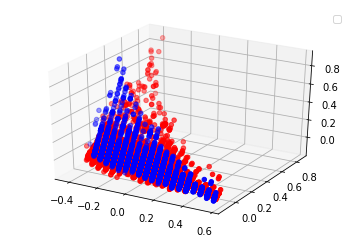

In [43]:
from mpl_toolkits.mplot3d import Axes3D
model.eval()
predict = model(Variable(x_train))
predict = predict.data.numpy()
# plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
# plt.plot(x_train.numpy(), predict, label='Fitting Line')
# X = x_train.numpy()
# print(type(X[:, 0]))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train.numpy()[:, 0], x_train.numpy()[:, 1], zs=y_train.numpy(), zdir='y',c = 'r')
ax.scatter(x_train.numpy()[:, 0], x_train.numpy()[:, 1], zs=predict, zdir='y',c = 'b')
plt.legend() 
plt.show()

torch.save(model.state_dict(), './linear00.pth')

Predicting all values

In [36]:
print(predict, y_train)

[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]] 
 4.6880e+06
 1.8530e+06
 1.0000e+06
     ⋮     
 4.0420e+06
 4.0100e+06
 2.3460e+06
[torch.FloatTensor of size 6000]

